# [Introduction to Machine Learning Course](https://albarqouni.github.io/courses/iml2022/)
**Instructor:** Prof. [Shadi Albarqouni](https://albarqouni.github.io/), University of Bonn 

## **Lab. 01:** [Logistic Regression](https://albarqouni.github.io/courses/iml2022/Lect03.pdf)

*The lab is borrowed from Andrew Ng's ML course. It was converted from Matlab to Python by Eng. Thaer Sahmoud, and fine-tuned and checked by Shadi Albarqouni.*

### **Goal:** This exercise will teach you how to implement logistic regression and apply it to two datasets. It is highly recommended that you watch the video lectures before starting the programming exercise.


### **Exercise:** In this assignment, you will build a logistic regression model to predict whether a student will be admitted to a university. You run a university department and need to determine the chances of each applicant of getting into the college based on their results on two exams. As a training set for logistic regression, you have historical data from previous applicants. There are two exams that an applicant took, as well as the admissions decision for each training example.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.optimize as opt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load and read the dataset 
dataset_1 = pd.read_csv("/content/drive/MyDrive/ML/lab01/ex2data1.txt",header=None) # create ML folder inside MyDrive and copy ex2 inside. 
dataset_1.columns=['Exam 1 score','Exam 2 score','y']
dataset_1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Exam 1 score,Exam 2 score,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


## Visualizing the data
A good practice before implementing any learning algorithm is to visualize the data if possible. A previous cell loads the data and stores it in three columns; Exam 1 score, Exam 2 score, and admission as 1 for admitted and 0 for not admitted. Display the data on a 2-dimensional plot by calling the function ```plotData```

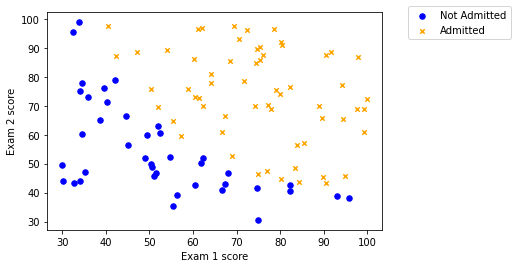

In [ ]:
def plotData(dataset):
    admitted = dataset.loc[dataset['y'] == 1]
    not_admitted = dataset.loc[dataset['y'] == 0]
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1],s=30,c='b', label='Not Admitted')
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1],s=20,marker='x',c='orange' ,label='Admitted')
    plt.legend(loc='upper right', bbox_to_anchor=(1.4,1.05))
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.show()

plotData(dataset_1)

## Implementation


*   **Sigmoid function:** As you might have learned during the lecture, one of the first steps to build your cost function is writing the activation sigmoid function $\sigma(\cdot)$ ```sigmoid``` which basically takes the logit an input $a_n$, and outputs the preciction $\mu_n$ 

In [ ]:
# sigmoid function sigmoid(a)
  # - a: logit 
  # - mu: prediction
def sigmoid(a):
    a = np.array(a)
    mu = 1 / (1+(np.exp(-a)))
    return mu 
sigmoid(0)

0.5

*   **Cost function:** Now you are supposed to write the Negative Log Liklihood (NLL) as your cost function ```costFunction``` which basically takes the design matrix $X$ along with the taregt labels $Y$ and output the cost $J = NLL(\theta)$ and the gradient $g = \nabla_{\theta}NLL(\theta)$ for a given parameter $\theta$. You can use the following formulas in your code: $NLL(\theta) = - \frac{1}{N} \sum_{n=1}^{N} y_n\log{\mu_n} + (1-y_n)\log{(1-\mu_n)}$ and $\nabla_{\theta}NLL(\theta) = \frac{1}{N} \sum_{n=1}^{N} (\mu_n - y_n)x_n$



In [ ]:
# cost function
  # - X: input design matrix of size N samples x D features
  # - Y: taregt labels of size N samples x C labels
  # - theta: parameters of size D x 1 
  # - J: the value of the cost function computed at parameter theta
  # - g: the gradient of the cost function computed at parameter theta
  # - H: the Hessian matrix (optional)

  
# this is my code but there is an error in optimizing the Cost Function I took a many time to solve it but then I write another one
'''def costFunction(theta, X, Y):
    N = Y.shape[0]
    theta = np.matrix(theta).reshape(-1,1)
    mu = (sigmoid(np.dot(X, theta))).reshape(-1)
    J = -(1 / N) * np.sum(y.T.dot(np.log(mu)) + (1 - y).T.dot(np.log(1 - mu)))
    g = (1 / N) * np.dot(X.T, mu - y)
    # mu = mu.reshape(-1)
    # S = np.diag((mu.multiply(1-mu)))
    # H = (1/N) * (X.T.dot(np.diag((mu.multiply(1-mu))))).dot(X) 
    return J, g.T'''

In [ ]:
def costFunction(theta, X, Y):
  N = Y.shape[0]
  theta = np.matrix(theta).reshape(-1,1)
  a = X.dot(theta)
  mu = sigmoid(a)
  J = -(1/N) * np.sum(Y.T.dot(np.log(mu)) + (1 - Y).T.dot(np.log(1 - mu)))
  g = (1 / N) * np.dot(X.T, mu - Y)
  mu = mu.reshape(-1,)
  H = (1/N) * ((X.T) @ np.diag(mu * (mu - 1)).dot(X))
  return J , g.T ,H

*   **Decision Boundary:** Given a value of $theta$, write the function ```plotDecisionBoundary``` to plot the data together with the decision boundary. 

In [ ]:
# also this is my code but it makes an appear error in Optimizing

'''def plotDecisionBoundary(X,y,opt_theta):
    
    x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
    y_values = - (opt_theta[0] + np.dot(opt_theta[1], x_values)) / opt_theta[2]
    plt.plot(x_values, y_values)
    plotData(dataset_1)
    plt.show()'''
   

In [ ]:
def plotDecisionBoundary(X,y,opt_theta):

  plt.figure(figsize=(7,5))
  ax = sns.scatterplot(x='Exam 1 score', y='Exam 2 score', hue='y', data=dataset_1, style='y', s=80)

  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles[1:], ['Not admitted', 'Admitted'])
  plt.title('Training data with decision boundary')

  plot_x = np.array(ax.get_xlim())
  plot_y = (-1/opt_theta[2]*(opt_theta[1]*plot_x + opt_theta[0]))
  plt.plot(plot_x, plot_y, '-', c="green")
  plt.show(ax)

*   **Sanity Check:** Let's test the ```costFunction``` and ```plotDecisionBoundary``` function with a few thetas $\theta$, for example, when $\theta = [0,0,0] $ and $\theta = [-24, 0.2, 0.2]$. To do so, read the data and store them in X and Y before you initialize $\theta$ and pass it to the ```costFunction``` to get the cost and the gradient. Plot the decision boundary

In [ ]:
m = dataset_1.shape[0]
X = np.hstack((np.ones((m,1)),dataset_1[['Exam 1 score', 'Exam 2 score']].values))
y = np.array(dataset_1.y.values).reshape(-1,1)

Cost at initial theta (zeros): 0.6931471805599453
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


<ipython-input-94-7133e0c61e70>:11: RuntimeWarning: divide by zero encountered in double_scalars
  plot_y = (-1/opt_theta[2]*(opt_theta[1]*plot_x + opt_theta[0]))
<ipython-input-94-7133e0c61e70>:11: RuntimeWarning: invalid value encountered in multiply
  plot_y = (-1/opt_theta[2]*(opt_theta[1]*plot_x + opt_theta[0]))


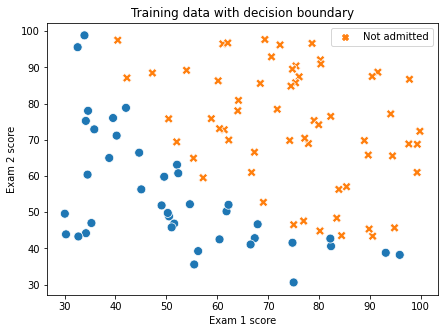

In [ ]:
# theta = [0,0,0]
initial_theta = np.zeros(shape=(X.shape[1]))
cost, grad,H = costFunction(initial_theta, X, y)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad[0])
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')
plotDecisionBoundary(X,y,initial_theta)

Cost at test theta: 0.2183301938265978
Expected cost (approx): 0.218
Gradient at test theta:
[0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
 0.043
 2.566
 2.647


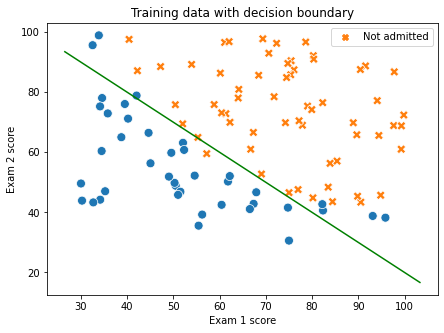

In [ ]:
# theta = [-24,0.2,0.2]
test_theta = np.array([-24, 0.2, 0.2])
cost, grad,H = costFunction(test_theta, X, y)
print('Cost at test theta:', cost)
print('Expected cost (approx): 0.218')
print('Gradient at test theta:')
print(grad[0])
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647')
plotDecisionBoundary(X,y,test_theta)

*   **Optimization:** We learned during the class how to minimize the cost fucntion using either first or second order methods. Implment the optimizer ```optimizeCostFunction``` using the first-order method: $\theta_{t+1} = \theta_t - \eta_t g_t = \theta_t - \eta_t\frac{1}{N}\sum_{n=1}^{N}(\mu_n - y_n)x_n$

In [ ]:
# Use the automatic solvers opt.optimize 

def optimize_theta(initial_theta, X, y):
    opt_results = opt.minimize(costFunction, initial_theta, args=(X, y), method='powell', jac=True, options={'maxiter':4000000})
    return opt_results['x'], opt_results['fun']

In [ ]:
from numpy.matrixlib.defmatrix import N
# Write your own optimizer using first- or second-order derivates 
# my optimize Cost Function but also appear error
'''def optimizeCostFunction(init_theta, X, Y, learning_rate, maxiter,order):
	#theta = init_theta[:,np.newaxis]
	cost, grad , H = costFunction(init_theta,X,Y)
	for iter in range(maxiter):
		if order == 1 :
			init_theta = init_theta - (learning_rate * grad)
			
		else :
			init_theta = init_theta -  learning_rate * (np.linalg.inv(H) @ grad)
		cost, grad, H = costFunction(init_theta, X,Y)
		theta = init_theta
	return theta ,cost'''

In [ ]:
# Write your own optimizer using first- or second-order derivates 
from numpy.matrixlib.defmatrix import N
def optimizeCostFunction(init_theta, X, Y, learning_rate, maxiter,order):
  theta = init_theta[:,np.newaxis]
  cost, grad, H = costFunction(theta,X,Y)

  for iter in range(maxiter):
    if order ==2:
      theta -= learning_rate * (np.linalg.inv(H)).dot(grad)
    else:
      theta -= learning_rate * grad.T
    cost, grad, H = costFunction(theta, X,Y)
    # iter += 1
    #plotDecisionBoundary(X,y,theta)
  return theta, cost

<ipython-input-93-b12921f41974>:6: RuntimeWarning: divide by zero encountered in log
  J = -(1/N) * np.sum(Y.T.dot(np.log(mu)) + (1 - Y).T.dot(np.log(1 - mu)))


Cost at theta found by fminunc: 0.23735852475342994
Expected cost (approx): 0.203
theta:
 [[-29.99604205]
 [  0.23675872]
 [  0.23161718]]
Expected theta (approx):
 -25.161
 0.206
 0.201


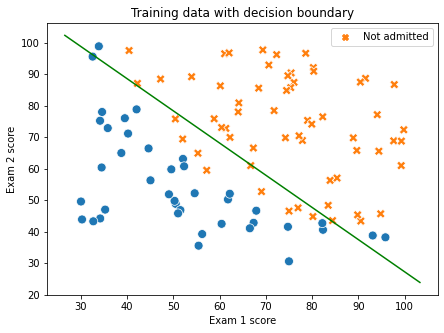

Cost at theta found by fminunc: nan
Expected cost (approx): 0.203
theta:
 [[-26.32624324]
 [  5.41261664]
 [  5.4074751 ]]
Expected theta (approx):
 -25.161
 0.206
 0.201


/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,
<ipython-input-93-b12921f41974>:6: RuntimeWarning: divide by zero encountered in log
  J = -(1/N) * np.sum(Y.T.dot(np.log(mu)) + (1 - Y).T.dot(np.log(1 - mu)))


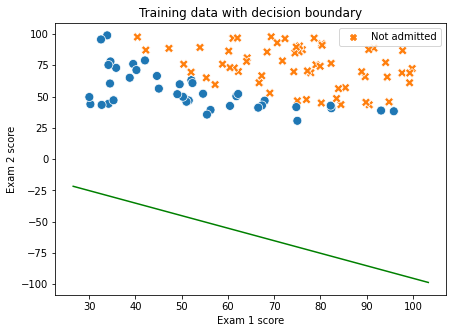

In [ ]:
random_theta = np.random.randn(X.shape[1])
opt_theta_1, cost_1 = optimizeCostFunction(random_theta, X, y, 0.005, 4000000,1)
print('Cost at theta found by fminunc:', cost_1)
print('Expected cost (approx): 0.203')
print('theta:\n', opt_theta_1.reshape(-1,1))
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201')
plotDecisionBoundary(X,y,opt_theta_1)

opt_theta_2, cost_2 = optimize_theta(random_theta, X, y)
print('Cost at theta found by fminunc:', cost_2)
print('Expected cost (approx): 0.203')
print('theta:\n', opt_theta_2.reshape(-1,1))
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201')
plotDecisionBoundary(X,y,opt_theta_2)

## Inference and Evaluation

**Inference:** Given a new query data point $x_q$, for example, a student with Exam 1 score of 45 and Exam 2 score of 85, what is the chance that of the student to be admitted to the school? Write a function ```predict``` which takes the $x_q$ and $\theta_{opt}$ as input, and return the prediction $\mu_q = \sigma(a_q)$. 

In [ ]:
# given the optimal theta 
# - y_pred: the predicted label 
# - y_prop: the probability of p(y = 1| x, theta)
def predict(X, opt_theta):
    y_prop = np.round(sigmoid(X.dot(opt_theta)),2)
    y_pred = (y_prop>= 0.5)
    y_pred.astype(int)
    return y_pred, y_prop

pred, prob = predict(np.array([1, 45, 85]),opt_theta_1)
print('For a student with scores 45 and 85, we predict an admission probability of', prob)
print('Expected value: 0.775 +/- 0.002')


For a student with scores 45 and 85, we predict an admission probability of [0.59]
Expected value: 0.775 +/- 0.002


**Evaluation:** Write the function ```evaluateModel``` which takes the input design matrix $X$, target $y$, and the optimal weight parameters $\theta_{opt}$, and return the accuracy of the model. 


In [ ]:
def evaluateModel(X,y,opt_theta):
  y_pred, y_prob = predict(X, opt_theta_1)
  acc = np.round(np.mean(y_pred == y.values) * 100,2) 
  print('Train accuracy:', acc,'%')

X = np.hstack((np.ones((m,1)),dataset_1[['Exam 1 score', 'Exam 2 score']].values))
y = dataset_1.y
evaluateModel(X,y, opt_theta_1)

Train accuracy: 50.8 %
